#  Walmart Retail Sales Time Series Analysis

This project explores Walmart's retail sales data to uncover monthly trends, moving averages, and seasonal patterns. We'll also break down revenue by product category and region over time.

### Objectives:
- Analyze monthly sales trends
- Plot moving averages and seasonal decomposition
- Break down revenue by department and store


#### Import Libraries

In [ ]:
import pandas as pd #  data loading, cleaning, and manipulation
import matplotlib.pyplot as plt # Creates static plots (line charts, bar plots, etc.)
import seaborn as sns # plot style and color harmony
from statsmodels.tsa.seasonal import seasonal_decompose # Breaks time series into trend, seasonality, and residuals



##  Step 1: Load and Merging the Dataset

Loading and merging the Walmart sales dataset and inspecting its structure.


In [15]:
# Load datasets
train = pd.read_csv("train.csv")
features = pd.read_csv("features.csv")
stores = pd.read_csv("stores.csv")


# Convert Date columns to datetime
train['Date'] = pd.to_datetime(train['Date'])   # - Converts the Date column to datetime format so we can resample and plot over time.
features['Date'] = pd.to_datetime(features['Date'])

# Merge datasets
df = train.merge(features, on=['Store', 'Date'], how='left') # Merges train with features (adds temperature, fuel price, etc.)
df = df.merge(stores, on='Store', how='left')   # Then merges with stores (adds store type and size)

df.head() # shows the first few rows of the final merged dataset







,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


##  Step 2: Aggregate Weekly Sales to Monthly Totals

To analyze long-term trends, I assembled the data to monthly frequency by summing weekly sales.

In [16]:
monthly_sales = df.resample('M', on='Date')['Weekly_Sales'].sum()
monthly_sales.head()

# - Resamples the data from weekly to monthly using .resample('M').
# - Aggregates sales by summing all weekly sales within each month.
# - This gives you a clean time series of monthly total sales.


C:\Users\marth\AppData\Local\Temp\ipykernel_14812\3838498576.py:1: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.resample('M', on='Date')['Weekly_Sales'].sum()


Date
2010-02-28    1.903330e+08
2010-03-31    1.819198e+08
2010-04-30    2.314124e+08
2010-05-31    1.867109e+08
2010-06-30    1.922462e+08
Freq: ME, Name: Weekly_Sales, dtype: float64

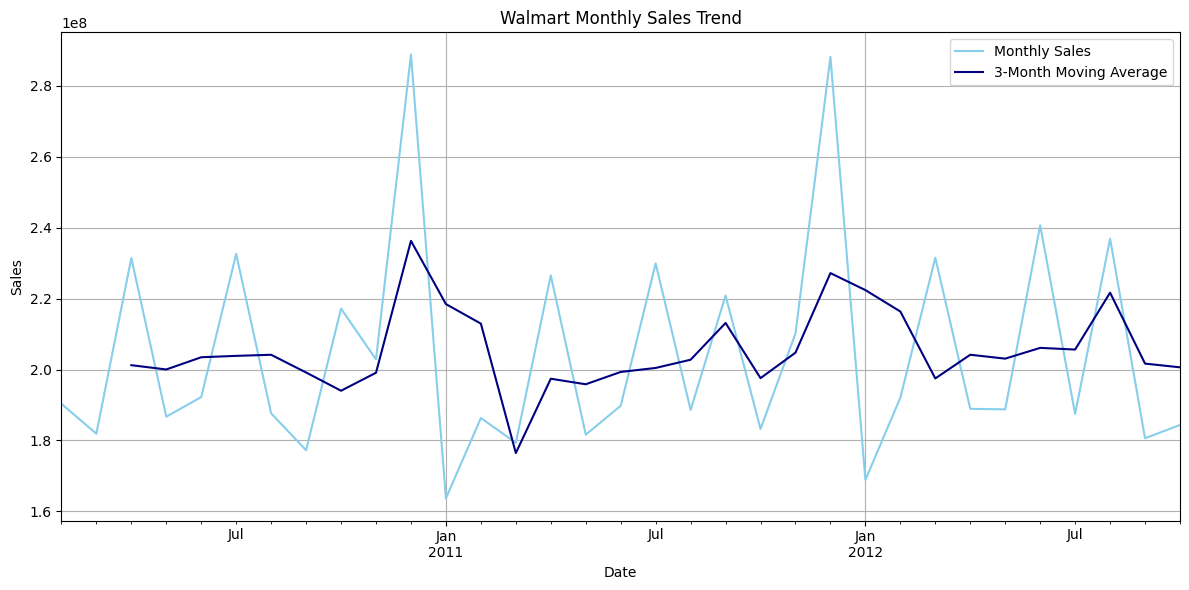

In [18]:
plt.figure(figsize=(12,6))
monthly_sales.plot(label='Monthly Sales', color='skyblue')
monthly_sales.rolling(3).mean().plot(label='3-Month Moving Average', color='navy')
plt.title("Walmart Monthly Sales Trend")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

## Step 4: Decompose Time Series

I used additive decomposition to separate the sales data into trend, seasonality, and residuals.


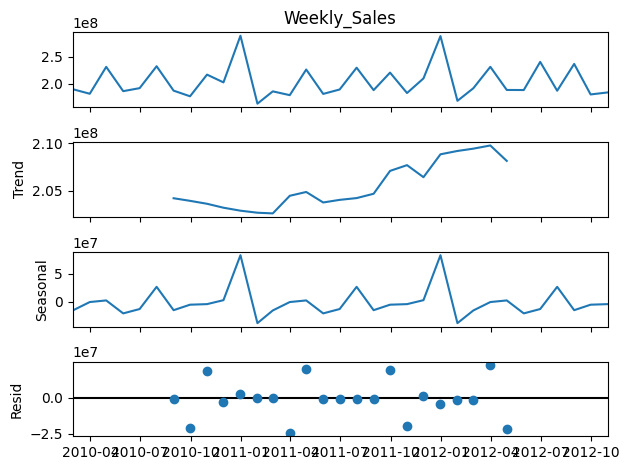

In [11]:
decomposition = seasonal_decompose(monthly_sales, model='additive')
decomposition.plot()
plt.tight_layout()
plt.show()


## Step 5: Revenue Breakdown

We analyze sales by department (`Dept`) and store (`Store`) to identify top-performing categories and regions.


C:\Users\marth\AppData\Local\Temp\ipykernel_14812\2683328596.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dept_sales[top_depts].resample('M').sum().plot(figsize=(12,6))


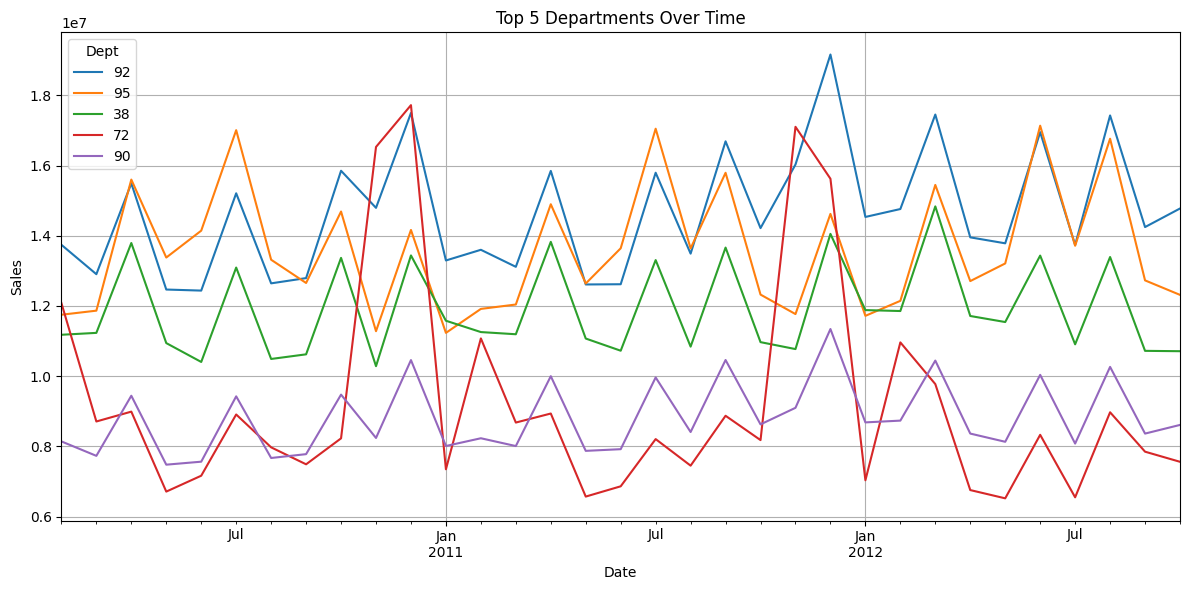

In [ ]:
dept_sales = df.groupby(['Date', 'Dept'])['Weekly_Sales'].sum().unstack() # - Groups sales by Date and Dept, then pivots so each department becomes a column.
top_depts = dept_sales.mean().sort_values(ascending=False).head(5).index  # - Finds the top 5 departments based on average sales

dept_sales[top_depts].resample('M').sum().plot(figsize=(12,6))
plt.title("Top 5 Departments Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title="Dept")
plt.grid(True)
plt.tight_layout()
plt.show()


C:\Users\marth\AppData\Local\Temp\ipykernel_14812\2469948830.py:4: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  store_sales[top_stores].resample('M').sum().plot(figsize=(12,6))


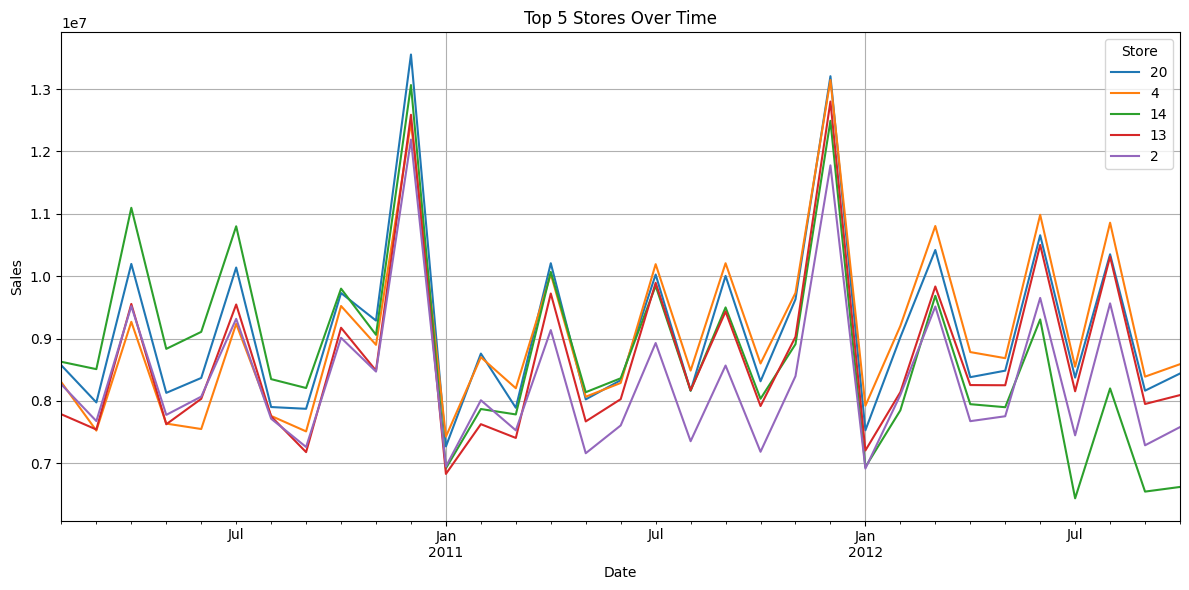

In [ ]:
store_sales = df.groupby(['Date', 'Store'])['Weekly_Sales'].sum().unstack() # - Groups sales by Date and Store, then pivots so each department becomes a column.
top_stores = store_sales.mean().sort_values(ascending=False).head(5).index # - Finds the top 5 stores based on average sales

store_sales[top_stores].resample('M').sum().plot(figsize=(12,6))  
plt.title("Top 5 Stores Over Time")
plt.xlabel("Date")
plt.ylabel("Sales")
plt.legend(title="Store")
plt.grid(True)
plt.tight_layout()
plt.show()
